# Identification of a promising tariff for a telecom company

The data of 500 users of telecom operator X are at disposal: who they are, where they are from, what tariff they use, how many calls and messages each sent in 2018. Operator X offers its customers two tariff plans: "Smart" and "Ultra". To adjust the ad budget, the commercial company wants to understand which plan makes the most money. The **goal** of the project: to analyze customer behavior and conclude which tariff is better.

**Data**:
We have at our disposal five tables containing various data required for subsequent analysis:
- calls: information about users' calls;
- internet: information about users' internet sessions;
- messages: information about users' messages;
- tariffs: information about tariffs;
- users: information about users.

# Tariffs description

**Tariff Smart:**
1. Monthly fee: 550 RUB
2. Included 500 minutes of conversation, 50 messages and 15 GB of Internet traffic
3. Cost of services in excess of the tariff package: 
- minute of conversation: 3 RUB (Company X always rounds up the values of minutes and megabytes. If the user spoke for only 1 second, a whole minute is counted in the tariff); 
- message: 3 RUB; 
- 1 GB of Internet traffic: 200 RUB.

**Tariff Ultra:**
1. Monthly fee: 1950 RUB
2. Included 3000 minutes of conversation, 1000 messages and 30 GB of Internet traffic
3. Cost of services in excess of the tariff package: 
- minute of conversation: 1 RUB; 
- message: 1 RUB; 
- 1 GB of Internet traffic: 150 RUB.


**Note**:
Company X always rounds seconds to minutes, and megabytes to gigabytes. Each call is rounded off separately: even if it lasted only 1 second, it will be counted as 1 minute.

For web traffic, individual sessions are not counted. Instead, the monthly total is rounded up. If the subscriber uses 1025 megabytes this month, they will be charged for 2 gigabytes.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Hypotheses-Testing" data-toc-modified-id="Hypotheses-Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hypotheses Testing</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Data Preprocessing

**Import necessary libraries and data:**

In [94]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import ceil 
from scipy import stats as st

# mute notifications
warnings.filterwarnings('ignore')

# importing datasets
calls = pd.read_csv('calls.csv', sep = ',')
internet = pd.read_csv('internet.csv', sep = ',')
messages = pd.read_csv('messages.csv', sep = ',')
tariffs = pd.read_csv('tariffs.csv', sep = ',')
users = pd.read_csv('users.csv', sep = ',')

**Function to check basic information about each dataset as as well as missing values and duplicates:**

In [58]:
def exploring(dataset):
    print(dataset.info())
    display(dataset.describe())
    print(dataset.isna().sum())
    print(dataset.duplicated().sum())

**'Calls' dataset**

In [59]:
exploring(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


id           0
call_date    0
duration     0
user_id      0
dtype: int64
0


So, 'calls' table contains general information about calls made by X company users, namely the following variables:

- 'id' - unique call number
- 'call_dat' - date of the call
- 'duration' - call duration in minutes
- 'user_id' - identifier of the user who made the call

There are 202607 observations in the table. Variables 'id' and 'call_date' are of type string, and variables 'duration' and 'user_id' are numeric, containing real numbers and integers, respectively. In the future, it will be necessary to change the data type reflecting the date of the call.

'Calls' dataset contains no missing values and no dublicates. 

**'Messages' dataset**

In [60]:
exploring(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


id              0
message_date    0
user_id         0
dtype: int64
0


As can be seen from the results, 'messages' table contains only three variables:

- 'id' - unique message number
- 'message_date' - date of the message
- 'user_id' - identifier of the user who sent the message

There are 123036 observations in total in the table. Variables 'id' and 'message_date' are of object type. Next, there is need to change he variable reflecting the date with another data type. The variable 'user_id' contains data of integers type.

As in previous dataset, 'messages' table contains no missing values and no dublicates.

**'Internet' dataset**

In [61]:
exploring(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
0


In total, the table contains 149396 observations. According to the info, this table contains 4 variables:

- 'id' - unique session number
- 'mb_used' - the amount of Internet traffic spent per session (in megabytes)
- 'session_date' - date of the Internet session
- 'user_id' - user ID

Among these variables there are several types: 'id' and 'session_date' are strings (the type of the variable with the date will need to be further replaced), 'mb_used' are real numbers, and 'user_id' are integers.

When examining this table, another column was found, named 'Unnamed: 0'. Let's look at its values:

In [62]:
print(internet['Unnamed: 0'])

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64


The column values appear to duplicate the index values. This is an extra column that will need to be removed.

As for missing values and duplicates, they were not found in this table either.

**'Tariffs' dataset**

In [63]:
exploring(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
0


The table with information about tariffs contains 8 variables:

- 'tariff_name' - tariff name
- 'rub_monthly_fee' - monthly subscription fee in rubles
- 'minutes_included' - the number of minutes of conversation per month included in the subscription fee
- 'messages_included' - number of messages per month included in the subscription fee
- 'mb_per_month_included' - the amount of Internet traffic included in the monthly fee (in megabytes)
- 'rub_per_minute' - the cost of a minute of conversation in excess of the tariff package (for example, if the tariff has 100 minutes of conversation per month, then a fee will be charged from 101 minutes)
- 'rub_per_message' - the cost of sending a message in excess of the tariff package
- 'rub_per_gb' - the cost of an additional gigabyte of Internet traffic in excess of the tariff package (1 gigabyte = 1024 megabytes)

There are 2 observations in total in the table, reflecting two available tariffs: "Smart" and "Ultra". All variables are of the integer type, except for the variable containing the name of the tariffs. It has an object type.

As in the case with the previous tables, no obvious defects in the form of missing values or duplicates could be identified.

**'Users' dataset**

In [64]:
exploring(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
0


As the name of dataset suggests, this table contains basic information about users, which is contained in the following variables:

- 'user_id' - unique user identifier
- 'first_name' - username
- 'last_name' - user's last name
- 'age' - the user's age (years)
- 'reg_date' - tariff activation date (day, month, year)
- 'churn_date' - the date of termination of the use of the tariff (if the value is omitted, then the tariff was still valid at the time of data upload)
- 'city' - user's city of residence
- 'tariff' - the name of the tariff plan

In total, the table contains data on 500 company X's users. Two variables: 'user_id' and 'age' are of type integer, and the rest of the variables are string objects. As can be seen, the average age of a ompany X's user is 46 years old. The youngest user is 18 years old, and the oldest is 75.

462 out of 500 users do not have a termination date of using the tariff. This may be due to the fact that they still use their tariffs, so these missing values do not pose any problem for further work with data. As for dublicates: no explicit duplicated values were found.

**Summary:**

Thus, the initial review of the dataset made it possible to identify the need for the following actions:

- in all tables where there is a variable reflecting the date, it is necessary to replace it with a different data type;
- in the Internet table, it is worth deleting a column that duplicates indexes;
- based on the data that was provided, it is necessary to round off the minutes of calls and megabytes of the Internet for subsequent manipulations with the data;
- just in case, there is need to bring the spelling of names and surnames to a single register and check again if there are duplicates in the table of users.

## Data Preparation

**1. Converting variables to the required types:**

To begin with, let's bring to the desired form the variables reflecting the dates in all tables:

In [65]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

Based on the initially specified information, let's round the 'duration' variable from the 'calls' table, as well as the 'mb_used' traffic variable from the internet table upwards:

In [66]:
calls['duration'].head()

0     0.00
1     0.00
2     2.85
3    13.80
4     5.18
Name: duration, dtype: float64

In [67]:
calls['duration'] = calls['duration'].apply(np.ceil)

calls['duration'].head()

0     0.0
1     0.0
2     3.0
3    14.0
4     6.0
Name: duration, dtype: float64

In [68]:
print(internet['mb_used'].head())

0     112.95
1    1052.81
2    1197.26
3     550.27
4     302.56
Name: mb_used, dtype: float64


In [69]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
print(internet['mb_used'].head())

0     113.0
1    1053.0
2    1198.0
3     551.0
4     303.0
Name: mb_used, dtype: float64


**2. Correction of data errors**

For an additional check for potential duplicates, it is necessary to transform the spellings of the last names and first names of users in the users table:

In [70]:
users['first_name'] = users['first_name'].str.capitalize()
users['last_name'] = users['last_name'].str.capitalize()

Let's check the table again for duplicate users:

In [71]:
users.duplicated().isna().sum()

0

Great, there are no duplicate users.

As next step, let's delete the extra column, which duplicates indexes in the internet table:

In [72]:
del internet['Unnamed: 0']
print(internet.head())

       id  mb_used session_date  user_id
0  1000_0    113.0   2018-11-25     1000
1  1000_1   1053.0   2018-09-07     1000
2  1000_2   1198.0   2018-06-25     1000
3  1000_3    551.0   2018-08-22     1000
4  1000_4    303.0   2018-09-24     1000


The next parts of the project assume the aggregation of data by month. Based on the fact that there are no separate variables containing months in the tables, let's add them to all tables:

In [73]:
calls['month'] = calls['call_date'].dt.month
print(calls['month'].head(5))

0     7
1     8
2     6
3     9
4    12
Name: month, dtype: int64


In [74]:
messages['month'] = messages['message_date'].dt.month
print(messages['month'].head(5))

0     6
1    10
2     8
3     6
4    12
Name: month, dtype: int64


In [75]:
internet['month'] = internet['session_date'].dt.month
print(internet['month'].head(5))

0    11
1     9
2     6
3     8
4     9
Name: month, dtype: int64


**3. Data Aggregation:**

**Calculation of the calls' number and minutes of conversation for each user by months**

In [76]:
# using pivot_table to aggregate data
calls_month = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
calls_month.columns = ['calls_count', 'calls_duration']
calls_month.head(5)

calls_count  calls_duration
user_id month                             
1000    5               22           159.0
        6               43           172.0
        7               47           340.0
        8               52           408.0
        9               58           466.0

**Number of messages sent by each user by month**

In [77]:
messages_month = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = ['count'])
messages_month.columns = ['messages_count']
messages_month.head(5)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

**Internet traffic consumed by each user by months**

In [78]:
mb_month = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['sum'])
mb_month.columns = ['mb_used']
mb_month.head(5)

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0

Let's combine all the aggregated tables for subsequent analysis:

In [79]:
data_month = calls_month.join([messages_month, mb_month], how = 'outer')
data_month.head(5)

calls_count  calls_duration  messages_count  mb_used
user_id month                                                      
1000    5             22.0           159.0            22.0   2256.0
        6             43.0           172.0            60.0  23257.0
        7             47.0           340.0            75.0  14016.0
        8             52.0           408.0            81.0  14070.0
        9             58.0           466.0            57.0  14581.0

Then, let's add to this table information about the tariffs of each of their specific users, which can be taken from the users table:

In [80]:
data_month = data_month.join(users.loc[:,['user_id', 'tariff']].set_index('user_id'), how='left', rsuffix='_y')
data_month.head(5)

calls_count  calls_duration  messages_count  mb_used tariff
user_id month                                                             
1000    5             22.0           159.0            22.0   2256.0  ultra
        6             43.0           172.0            60.0  23257.0  ultra
        7             47.0           340.0            75.0  14016.0  ultra
        8             52.0           408.0            81.0  14070.0  ultra
        9             58.0           466.0            57.0  14581.0  ultra

Let's add information about the city in the same way:

In [81]:
data_month = data_month.join(users.loc[:,['user_id', 'city']].set_index('user_id'), how='left', rsuffix='_y')
data_month.reset_index(inplace=True)
data_month.head(5)

,user_id,month,calls_count,calls_duration,messages_count,mb_used,tariff,city
0,1000,5,22.0,159.0,22.0,2256.0,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,23257.0,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,14016.0,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,14070.0,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,14581.0,ultra,Краснодар


In order to calculate the **revenue** from each of the clients, there is need to write a special function. The function will contain the following steps:

1. Subtract the free limit from the minutes, messages and megabytes spent by the user
2. Multiply the remainder by indicators from the tariff plan
3. Add the received overpayment with the monthly subscription fee

In [83]:
def month_income(row):
    calls_count = row['calls_count']
    calls_duration = row['calls_duration']
    messages_count = row['messages_count']
    mb_used = row['mb_used']
    tariff = row['tariff']
    
## Variables that will contain information about tariffs:
    tariff_minutes = int(tariffs.loc[tariffs.loc[:, 'tariff_name'] == tariff]['minutes_included'])
    tariff_messages = int(tariffs.loc[tariffs.loc[:, 'tariff_name'] == tariff]['messages_included'])
    tariff_mb = int(tariffs.loc[tariffs.loc[:, 'tariff_name'] == tariff]['mb_per_month_included'])
    tariff_costs = int(tariffs.loc[tariffs.loc[:, 'tariff_name'] == tariff]['rub_monthly_fee'])
    over_limit_minutes = int(tariffs.loc[tariffs.loc[:,'tariff_name'] == tariff]['rub_per_minute'])
    over_limit_messages = int(tariffs.loc[tariffs.loc[:,'tariff_name'] == tariff]['rub_per_message'])
    over_limit_gb = int(tariffs.loc[tariffs.loc[:,'tariff_name'] == tariff]['rub_per_gb'])
    
    extra_calls = 0
    extra_messages = 0
    extra_mb = 0
    
    if calls_duration > tariff_minutes:
        extra_calls = (calls_duration - tariff_minutes) * over_limit_minutes
    if messages_count > tariff_messages:
        extra_messages = (messages_count > tariff_messages) * over_limit_messages
    if mb_used > tariff_mb:
        extra_mb = ceil((mb_used - tariff_mb) / 1000) * over_limit_gb
        
# Division by 1000 and rounding is necessary due to an additional condition,
# that each tariff plan assumes rounding to the nearest gigabyte

    return tariff_costs + extra_calls + extra_messages + extra_mb

In [84]:
data_month['month_income'] = data_month.apply(month_income, axis = 1)
data_month.reset_index(inplace=True)
data_month.head(5)

,index,user_id,month,calls_count,calls_duration,messages_count,mb_used,tariff,city,month_income
0,0,1000,5,22.0,159.0,22.0,2256.0,ultra,Краснодар,1950.0
1,1,1000,6,43.0,172.0,60.0,23257.0,ultra,Краснодар,1950.0
2,2,1000,7,47.0,340.0,75.0,14016.0,ultra,Краснодар,1950.0
3,3,1000,8,52.0,408.0,81.0,14070.0,ultra,Краснодар,1950.0
4,4,1000,9,58.0,466.0,57.0,14581.0,ultra,Краснодар,1950.0


## Data Analysis

In this part of the project, the following tasks will be performed:
- described the behavior of the operator's clients, based on the sample;
- identifying how many minutes of conversation, how many messages and how much Internet traffic is required by users of each tariff per month;
- calculation of the mean, variance and standard deviation;
- plotting a histogram and describing the distribution of data .

**Let's check how many minutes of conversation, messages and the volume of Internet traffic are required for the user of each tariff per month:**

In [85]:
per_month = data_month.pivot_table(index = ['user_id', 'tariff'], values = ['calls_duration', 'messages_count', 'mb_used'], aggfunc = 'median')
per_month

,,calls_duration,mb_used,messages_count
user_id,tariff,,,
1000,ultra,339.0,14325.5,65.0
1001,smart,422.0,16252.5,NaN
1002,smart,214.0,17601.0,11.0
1003,ultra,824.0,11368.0,83.0
1004,ultra,132.5,17828.5,154.5
...,...,...,...,...
1495,ultra,954.0,29393.0,82.0
1496,smart,524.0,24067.5,41.5
1497,smart,490.0,14174.0,17.0


**Calculation of mean, variance and standard deviation:**

In [87]:
per_month2 = data_month.pivot_table(index = ['tariff'], values = ['calls_duration', 'messages_count', 'mb_used'], 
                                    aggfunc = {'calls_duration': [np.mean, np.median, np.var, np.std],
                                               'messages_count': [np.mean, np.median, np.var, np.std],
                                               'mb_used': [np.mean, np.median, np.var, np.std]})
per_month2

calls_duration                                        mb_used           \
                 mean median         std           var          mean   median   
tariff                                                                          
smart      419.062978  423.0  189.325618  35844.189551  16236.472621  16532.0   
ultra      545.451104  528.0  306.925754  94203.418396  19686.767179  19411.0   

                                  messages_count                    \
                std           var           mean median        std   
tariff                                                               
smart   5868.824472  3.444310e+07      38.716441   34.0  26.787949   
ultra   9952.057054  9.904344e+07      61.161006   51.0  45.931026   

                     
                var  
tariff               
smart    717.594201  
ultra   2109.659183

**Exploring the distribution**

1) Histogram for call duration:

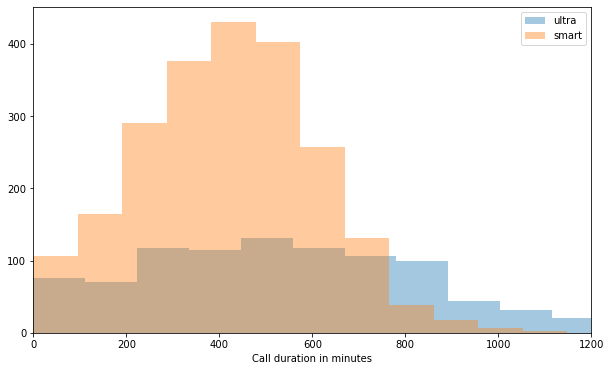

In [91]:
plt.figure(figsize=(10,6))
for tariff in ['ultra', 'smart']:
    sns.distplot(data_month.query('tariff == @tariff')['calls_duration'], kde=False, bins=15)


plt.xlim(0,1200)
plt.xlabel('Call duration in minutes')
plt.legend(['ultra', 'smart'])
plt.show()

2) Histogram for message number:

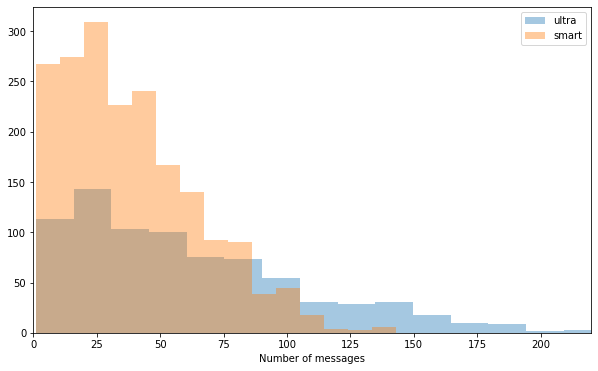

In [92]:
plt.figure(figsize=(10,6))
for tariff in ['ultra', 'smart']:
    sns.distplot(data_month.query('tariff == @tariff')['messages_count'], kde=False, bins=15)


plt.xlim(0,220)
plt.xlabel('Number of messages')
plt.legend(['ultra', 'smart'])
plt.show()

3) Histogram for internet traffic:

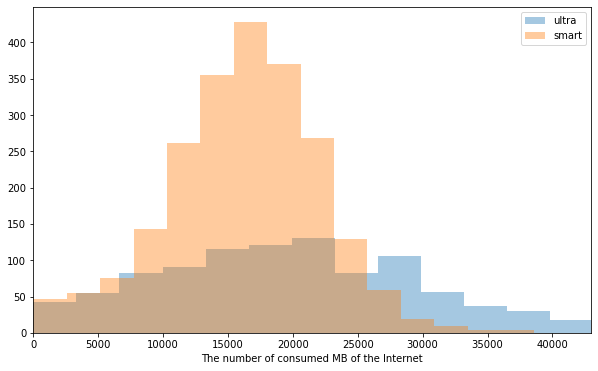

In [93]:
plt.figure(figsize=(10,6))
for tariff in ['ultra', 'smart']:
    sns.distplot(data_month.query('tariff == @tariff')['mb_used'], kde=False, bins=15)


plt.xlim(0,43000)
plt.xlabel('The number of consumed MB of the Internet')
plt.legend(['ultra', 'smart'])
plt.show()

The performed analysis of the data allows to draw several conclusions about the differences in the use of communication services (telephone calls, messages and Internet traffic consumption) by company X users, who have two different tariffs: Ultra and Smart.

**Average call duration** is longer among Ultra tariff users: 514 minutes versus 395 minutes for Smart tariff. Users of the "Ultra" tariff also send **more messages** than users of the "Smart" tariff: on average 51 messages against 34. There is a significant difference between the **amount of Internet consumed**: 19668 megabytes are consumed on average per month by users of the "Ultra" tariff, and users of the tariff "Smart" - 16215 megabytes. 

If we compare the obtained data with the tariff proposals, it becomes obvious that the **"Ultra" tariff users** on average use less than half of the options available to them: 514 minutes of a conversation out of the 3000 provided, 51 messages out of 1000 and almost 20,000 megabytes out of the 30,000 provided. As for the **tariff "Smart"** users, then on average they are inclined to use up a large amount of the provided benefits: 395 minutes of conversation from the provided 500, 34 messages from 50 and 16215 megabytes of Internet from 15000 provided free of charge. That is, the average user of the tariff "Smart" is even forced to pay extra internet to make up for the lack of free quantity.

According to the data from the tables and the distribution of data on the graphs, it can be immediately seen that the dispersion of the "Smart" tariff in relation to all three variables (call duration, number of messages and the number of megabytes of Internet) is significantly lower than that of the "Ultra" tariff. This can be interpreted by the fact that the Ultra tariff users have much more access to more benefits from company X. They are less limited in the number of minutes for calls, in the number of messages and the number of megabytes of the Internet. While the data for the "Smart" tariff have a more "normal" distribution and sometimes even shift to the left (in the case of the number of messages), the data for the "Ultra" tariff have a much less pronounced peak in frequent values, and also tend to shift to the right (with the exception of the variable about the number of messages, the distribution there is also shifted to the left, but less pronounced than among the users of the "Smart" tariff).

## Hypotheses Testing

**4.1. Average revenue of users of Ultra and Smart tariffs differ**

To begin with, let's formulate a null and an alternative hypothesis:
    
**H0:** Average revenue of users of Ultra and Smart tariffs does not differ (their average revenue is equal)

**H1:** Average revenue of users of Ultra and Smart tariffs differ (their average revenue is unequal)

Since the hypotheses formulated relate to the means of two samples, a two-tailed t-test is applicable. Let's take the threshold value of 0.05 as the significance level.

In [97]:
ultra = data_month.query('tariff == "ultra"')['month_income']
smart = data_month.query('tariff == "smart"')['month_income']

alpha = 0.05

results = st.ttest_ind(ultra, smart, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Rejecting H0')
else:
    print('Failed to reject H0')

p-value: 2.5848180986600253e-245
Rejecting H0


Based on the above test, it can be concluded that it is not possible to reject H0, so we can say that the average revenue of users of the "Smart" and "Ultra" tariffs differ.

Let's check it out in numbers:

In [98]:
data_month.pivot_table(index = 'tariff', values = 'month_income', aggfunc = 'mean')

,month_income
tariff,
smart,1288.765814
ultra,2073.045685


The data from the pivot table confirms that the revenue from the "Ultra" tariff, indeed, is significantly higher than the revenue from the "Smart" tariff: by almost 800 RUB.

**4.2. The average revenue from users from Moscow differs from the revenue of users from other regions.**

**H0:** Users from Moscow bring Company X same revenue as users from other regions (groups are equal in terms of revenue)

**H1:** Users from Moscow bring Company X more revenue that users from other regions (groups are not equal in terms of revenue)

Let us apply the same two-sided t-test. Alpha level - 0.05:

In [104]:
Moscow = data_month.query('city == "Москва"')['month_income']
regions = data_month.query('city != "Москва"')['month_income']

alpha = 0.05

results = st.ttest_ind(Moscow, regions, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Rejecting H0')
else:
    print('Failed to reject H0')

p-value: 0.4661125858988385
Failed to reject H0


But this time the null hypothesis could not be rejected, so it cannot be argued that the average revenue of users from Moscow and from other regions is different. Let's look at the numbers. To do this, let's use a function which will create a new variable reflecting whether a user is from Moscow or from another region.

In [105]:
def region(city):
    if city == 'Москва':
        return 'Moscow'
    else:
        return 'region'
    
data_month['region'] = data_month['city'].apply(region)

In [106]:
data_month.pivot_table(index = 'region', values = 'month_income')

,month_income
region,
Moscow,1549.566285
region,1524.327315


As can be seen, the average revenue from Moscow users is only slightly higher than from other regions (only 30 RUB difference).

## Conclusion

All in all, based on the analysis done, several conclusions can be drawn about the "Smart" and "Ultra" tariffs of the Company X network:

1. The "Ultra" tariff turns out to be more profitable for the company X itself, since the average revenue from it (2,072 RUB) significantly exceeds the average revenue from the Smart tariff (1,253 RUB) by almost two times.
2. User behavior for the two tariffs is also significantly different:
- Users of the "Ultra" tariff do not spend even half of the benefits provided to them (with the exception of the Internet, where on average they consume almost 20 GB of the Internet provided by 30 GB)
- On the contrary, users of the "Smart" tariff almost completely spend the minutes, messages and Internet provided to them. Moreover, on average, the user of the "Smart" tariff does not have enough Internet, since about 16 GB of the 15 GB available in the tariff are consumed.
3. If we talk about regional differences, it was not possible to identify any difference between the revenue from clients from Moscow and from other regions.